In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets, decomposition

# Dataset and features

In [ ]:
data = pd.read_csv('heart.csv')

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


The "Heart Failure" dataset is a combined set with clinical information of patients from different coutries. There are demographic - Age and Sex -, and clinical variables, and the target variable - HeartDisease.

Purpose of this data is to aid researchers build a perdictive model for early diagnosis of life-threatening heart conditions.

Features description (Kaggle):

    Age: age of the patient [years]
    Sex: sex of the patient [M: Male, F: Female]
    ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    RestingBP: resting blood pressure [mm Hg]
    Cholesterol: serum cholesterol [mm/dl]
    FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    Oldpeak: oldpeak = ST [Numeric value measured in depression]
    ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    HeartDisease: output class [1: heart disease, 0: Normal]


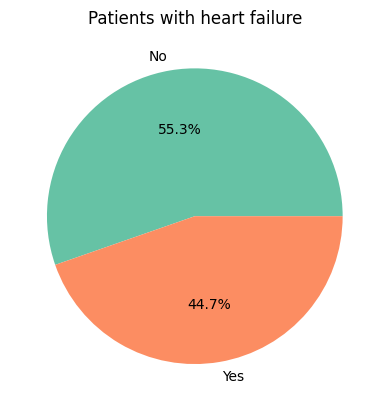

In [ ]:
x = data['HeartDisease'].value_counts()

colors = sns.color_palette("Set2")

plt.pie(x.values,
        labels=['No', 'Yes'],
        labeldistance=1.1,
        autopct='%1.1f%%',
        colors=colors)

plt.title("Patients with heart failure")

plt.show()

# Age and HeartDisease

As depicted below, age in genereal is bell curved in the sample, but there are obviuos shift in the distribution when dividing by target variable: patients with heart failure are somewhat older than those without it.



Text(0.5, 1.0, 'Patients by age')

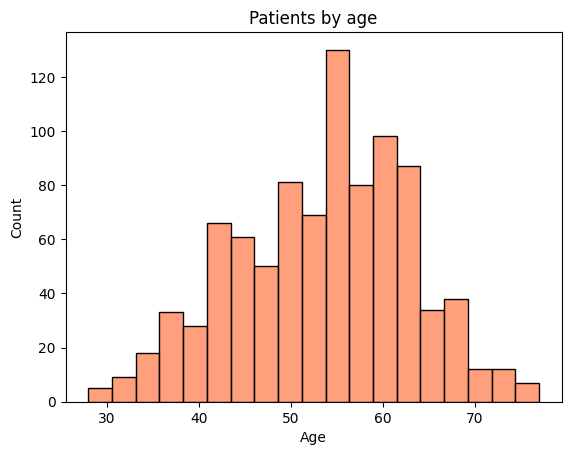

In [ ]:
sns.histplot(data, x='Age', color='coral').set_title('Patients by age')

<Axes: xlabel='Age', ylabel='Count'>

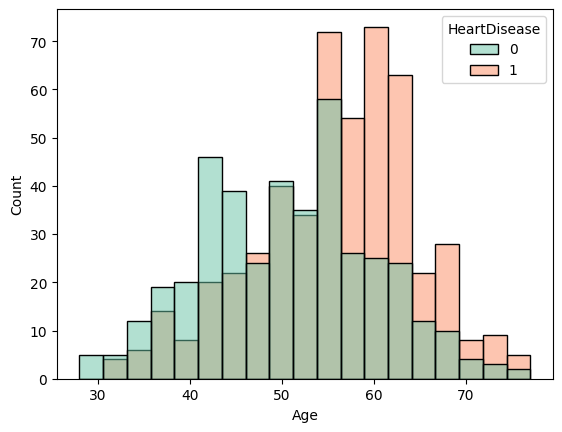

In [ ]:
sns.histplot(data, x="Age", hue='HeartDisease', palette="Set2")


# Sex and HeartDisease

We can clearly see that sex is greatly affects onset of heart failure: while among men heart failure is almost 2 times more frequent than healthy condition, in wemen distribution is more than opposite, as there is more than 2 times higher frequency of normal heart among female patients.

Text(0.5, 1.0, 'Patients by gender')

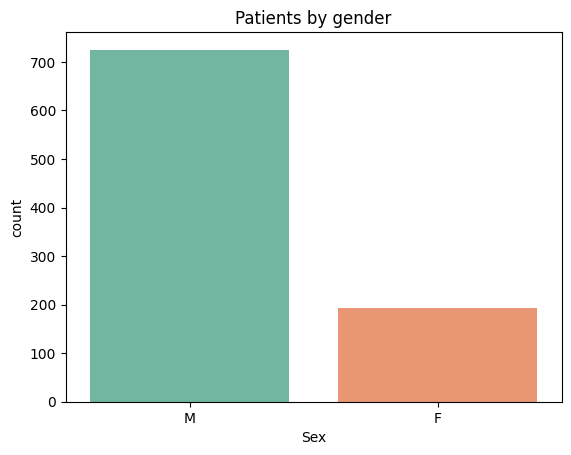

In [ ]:
sns.countplot(data, x='Sex', hue='Sex', palette='Set2').set_title('Patients by gender')


<Axes: xlabel='Sex', ylabel='count'>

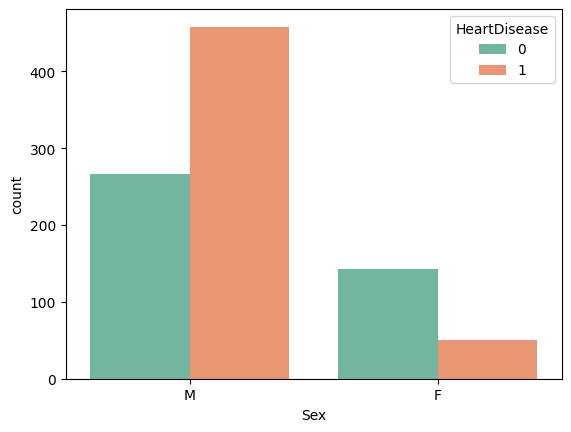

In [ ]:
sns.countplot(data, x='Sex', hue='HeartDisease', palette='Set2')

# RestingBP and HeartDisease

Blood pressure is almost normally distributed, but there are some abnormal observations below 80 and even below 50, which are outliers. Surprisingly, effect of this variable on the HeartDisease is not very expressed, but as exprected, in the group with heart failure blood pressure is somewhat higher than in healthy group.

Text(0.5, 1.0, 'Patients by RestingBP')

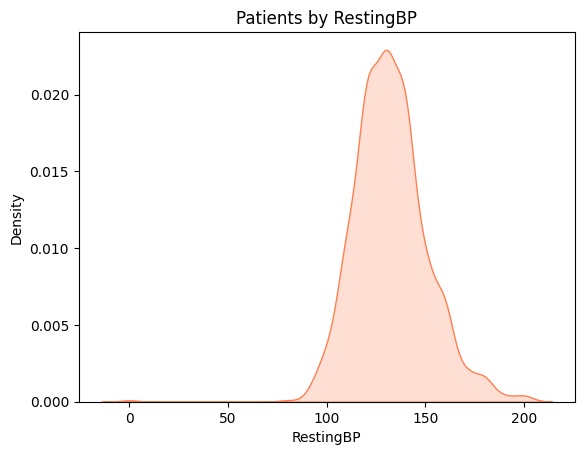

In [ ]:
sns.kdeplot(data, x='RestingBP', fill='coral', color='coral').set_title('Patients by RestingBP')

Text(0.5, 1.0, 'Patients by RestingBP and HeartDisease')

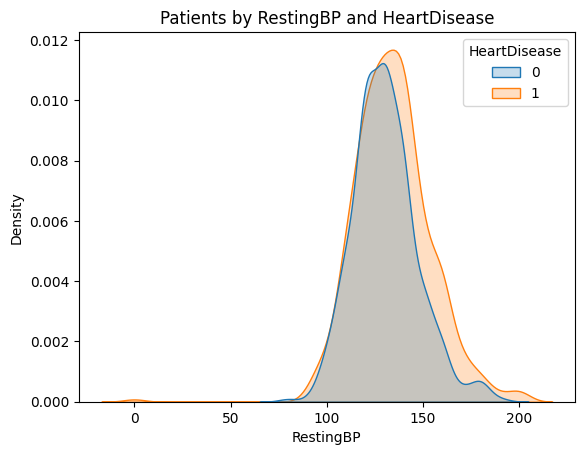

In [ ]:
sns.kdeplot(data, x='RestingBP', hue='HeartDisease', fill='HeartDisease').set_title('Patients by RestingBP and HeartDisease')

# Cholesterol and HeartDisease

Cholesterol level distribution is rather strange: there is a lot of patients with zero cholesterol, and that could be interpreted both as absence of results and as cholesterol level below test sensetivety. In both cases, I,d marked these observations as unrelieble.

Within relevant cholesterol levels, it is slightly higher in herat failure group, and modes are different.

Text(0.5, 1.0, 'Patients by Cholesterol')

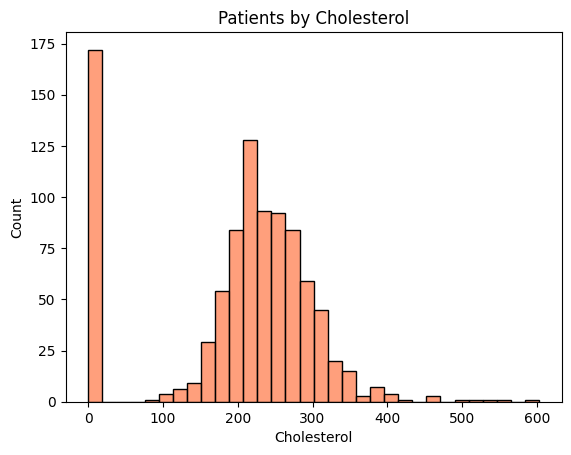

In [ ]:
sns.histplot(data, x='Cholesterol', fill='coral', color='coral').set_title('Patients by Cholesterol')

Text(0.5, 1.0, 'Patients by Cholesterol and HeartDisease')

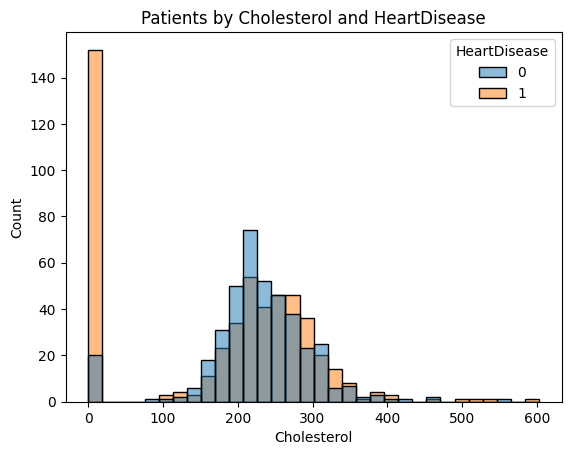

In [ ]:
sns.histplot(data, x='Cholesterol', hue='HeartDisease', fill='HeartDisease').set_title('Patients by Cholesterol and HeartDisease')

# ChestPainType and heart disease

Among all chest pain types, Asymptomatic is the most frequent, and also has a huge imbalance of hear failure and healthy patients.

Text(0.5, 1.0, 'Patients by ChestPainType')

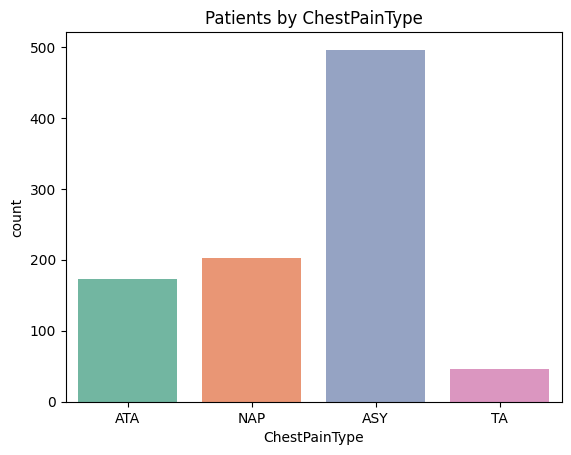

In [ ]:
sns.countplot(data, x='ChestPainType', hue='ChestPainType', palette='Set2').set_title('Patients by ChestPainType')

<Axes: xlabel='ChestPainType', ylabel='count'>

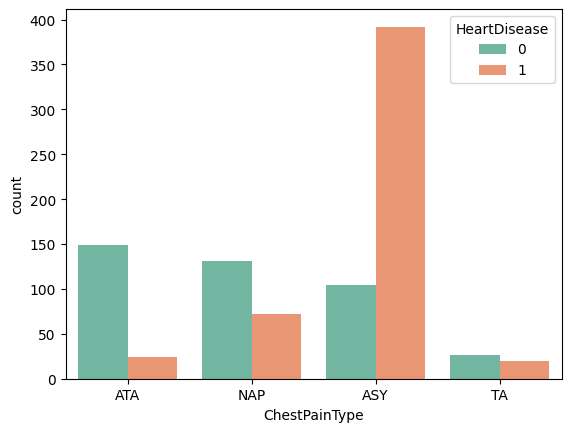

In [ ]:
sns.countplot(data, x='ChestPainType', hue='HeartDisease', palette='Set2')

# FastingBS and HeartDisease

There is significanlty less patients with high sugar, but among them majority has a heart failure.

Text(0.5, 1.0, 'Patients by FastingBS')

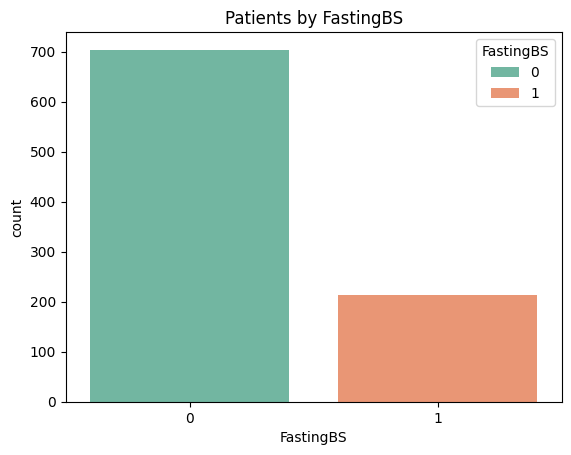

In [ ]:
sns.countplot(data, x='FastingBS', hue='FastingBS', palette='Set2').set_title('Patients by FastingBS')

<Axes: xlabel='FastingBS', ylabel='count'>

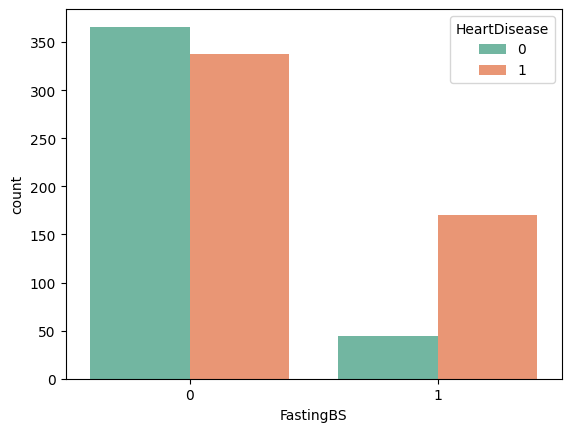

In [ ]:
sns.countplot(data, x='FastingBS', hue='HeartDisease', palette='Set2')

# RestingECG and HeartDisease

As expected, patients with ECG abnormalities has slightly greater fraction of heart failure.


Text(0.5, 1.0, 'Patients by FastingBS')

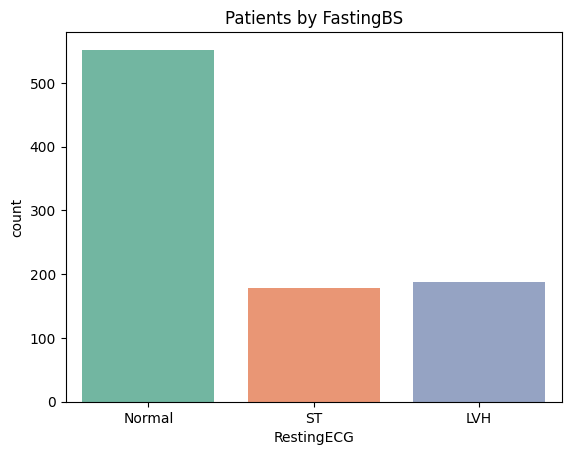

In [ ]:
sns.countplot(data, x='RestingECG', hue='RestingECG', palette='Set2').set_title('Patients by FastingBS')

<Axes: xlabel='RestingECG', ylabel='count'>

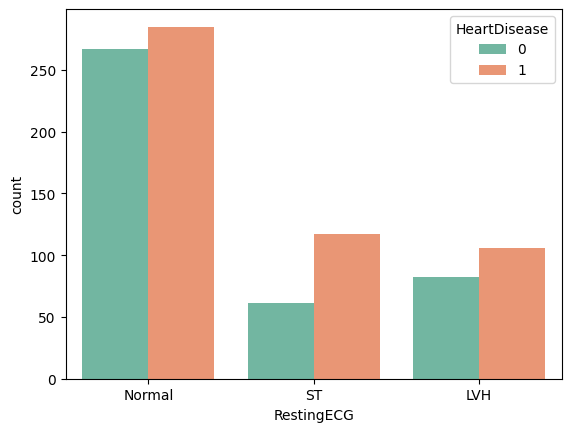

In [ ]:
sns.countplot(data, x='RestingECG', hue='HeartDisease', palette='Set2')

# MaxHR and HeartDisease

It was a surprise for me that maximum heart rate is actually greater in healthy people than in heart failure group. Accordingly, there is two modes in MaxHR distribution.

Text(0.5, 1.0, 'Patients by RestingBP')

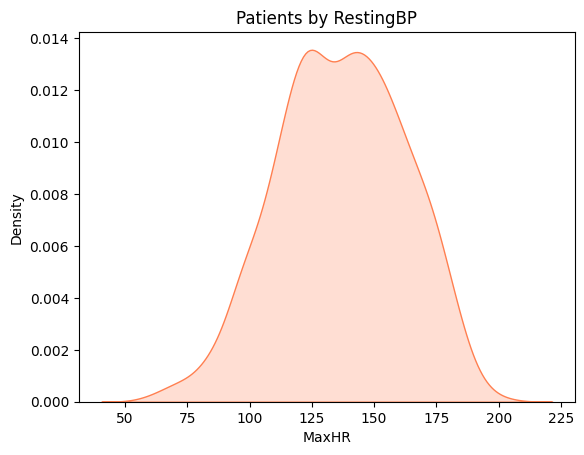

In [ ]:
sns.kdeplot(data, x='MaxHR', fill='coral', color='coral').set_title('Patients by MaxHR')

Text(0.5, 1.0, 'Patients by RestingBP and HeartDisease')

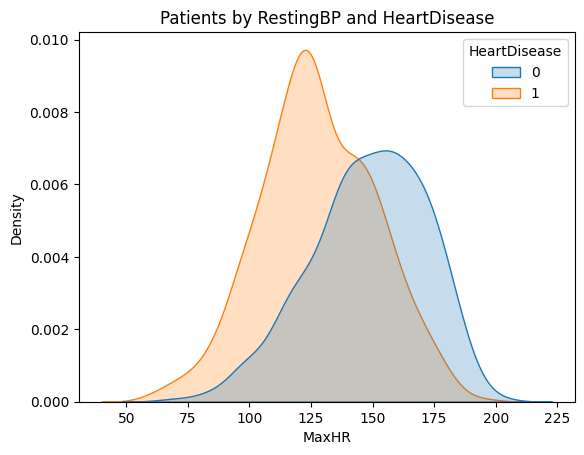

In [ ]:
sns.kdeplot(data, x='MaxHR', hue='HeartDisease', fill='HeartDisease').set_title('Patients by MaxHR and HeartDisease')

# ExerciseAngina and HeartDisease

It appears that whether the patient has exercise angina or not is a very good predictor of heart failure status, as there is almost 7 times difference in heart failure status among those who has EA.

Text(0.5, 1.0, 'Patients by ExerciseAngina')

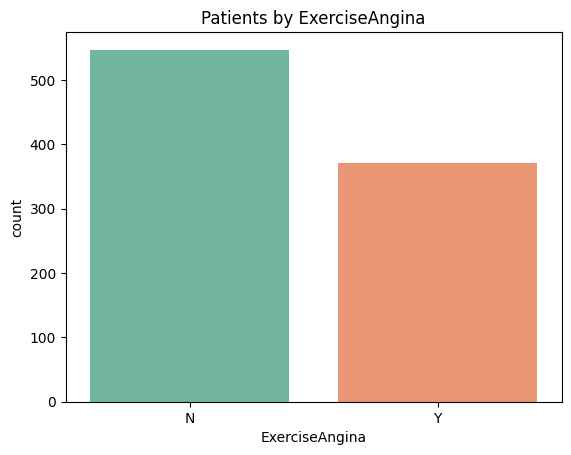

In [ ]:
sns.countplot(data, x='ExerciseAngina', hue='ExerciseAngina', palette='Set2').set_title('Patients by ExerciseAngina')

<Axes: xlabel='ExerciseAngina', ylabel='count'>

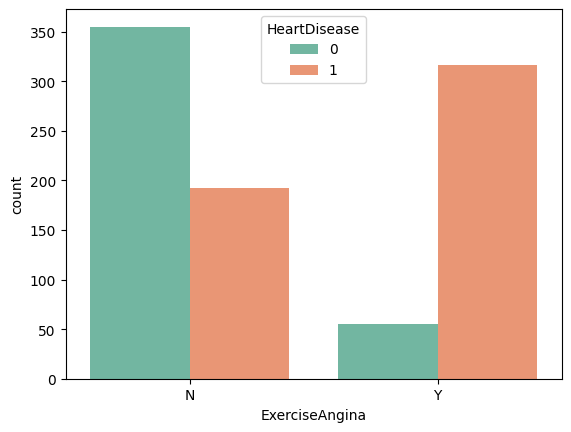

In [ ]:
sns.countplot(data, x='ExerciseAngina', hue='HeartDisease', palette='Set2')

# Oldpeak and HeartDisease

Oldpeak is a depression of ST interval during exercise.

There is a difference in quantity of patients with zero old peak in HF and healthy groups. Also, ST depression tends to be more expressed in HF group.

Text(0.5, 1.0, 'Patients by Cholesterol')

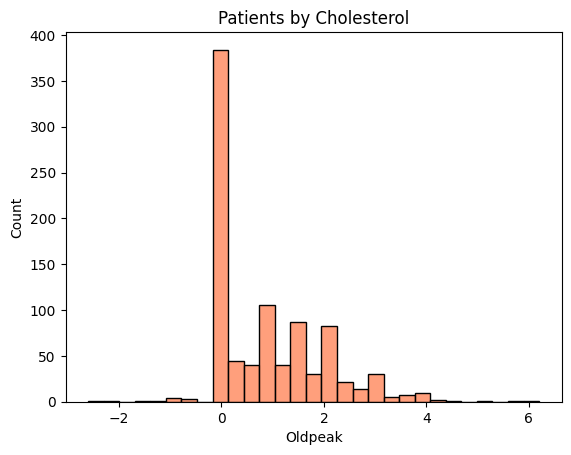

In [ ]:
sns.histplot(data, x='Oldpeak', fill='coral', color='coral').set_title('Patients by Oldpeak')

Text(0.5, 1.0, 'Patients by Cholesterol and HeartDisease')

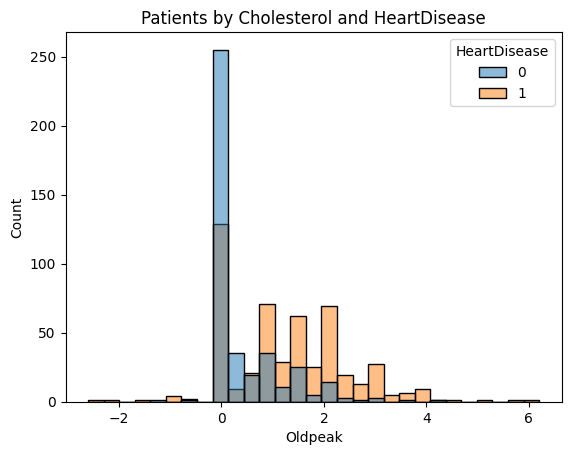

In [ ]:
sns.histplot(data, x='Oldpeak', hue='HeartDisease', fill='HeartDisease').set_title('Patients by Cholesterol and HeartDisease')

# ST_Slope and HeartDisease

I'm not an expert in ECG interpretation, but it appears that any ST slope but Up is very bad prognostic marker, as there is unfavorable difference in proportion of  heart failures in "flat" and "down" groups.

Text(0.5, 1.0, 'Patients by ST_Slope')

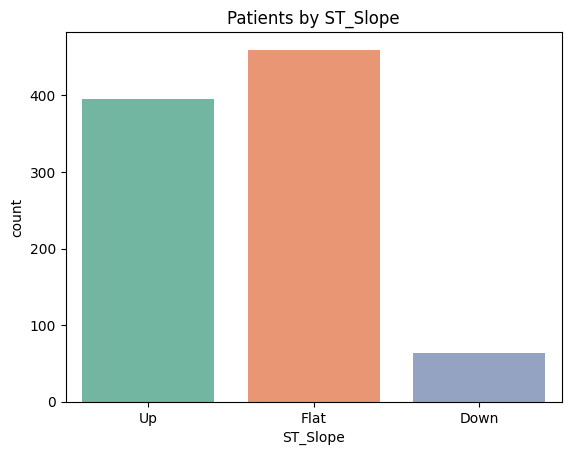

In [ ]:
sns.countplot(data, x='ST_Slope', hue='ST_Slope', palette='Set2').set_title('Patients by ST_Slope')

<Axes: xlabel='ST_Slope', ylabel='count'>

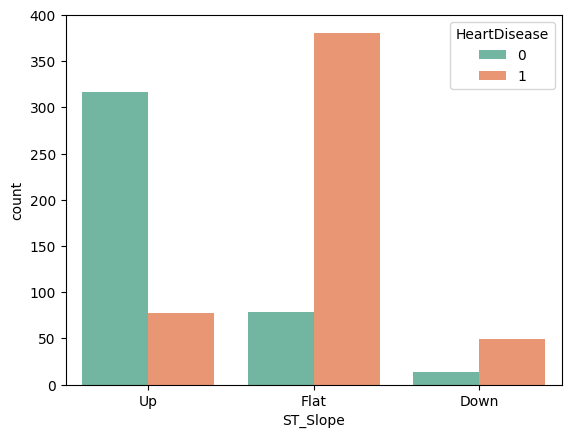

In [ ]:
sns.countplot(data, x='ST_Slope', hue='HeartDisease', palette='Set2')

# Multivariate analysis
## Defining predictive features and PCA

Among all features, there are those with a higher impact on a target variable: Age, Sex, ExerciseAngina, ST_Slope, ChestPainType, MaxHR, FastingBS and Oldpeak. We can asses the distance defined by these features by PCA plot. There is clear gradient between two groups of patients, and it is a promising picture regarding the possibility of classfifcation by ML tools.


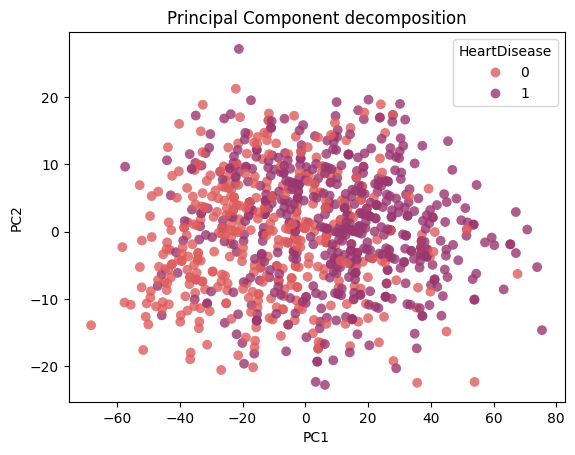

In [ ]:
X = pd.get_dummies(data[['Age', 'Sex', 'ExerciseAngina', 'ST_Slope', 'ChestPainType', 'MaxHR', 'FastingBS', 'Oldpeak']])

y = data['HeartDisease']

pca = decomposition.PCA(n_components=2)
X_tr = pca.fit_transform(X)


ax = sns.scatterplot(x=X_tr[:, 0], y=X_tr[:, 1], hue=y, palette="flare",
                     s=50, linewidth=0, alpha=0.8)

ax.set(xlabel='PC1', ylabel='PC2')
plt.title('Principal Component decomposition')
plt.show()


As we can see on corrplot, there is no strong correlations between these features:


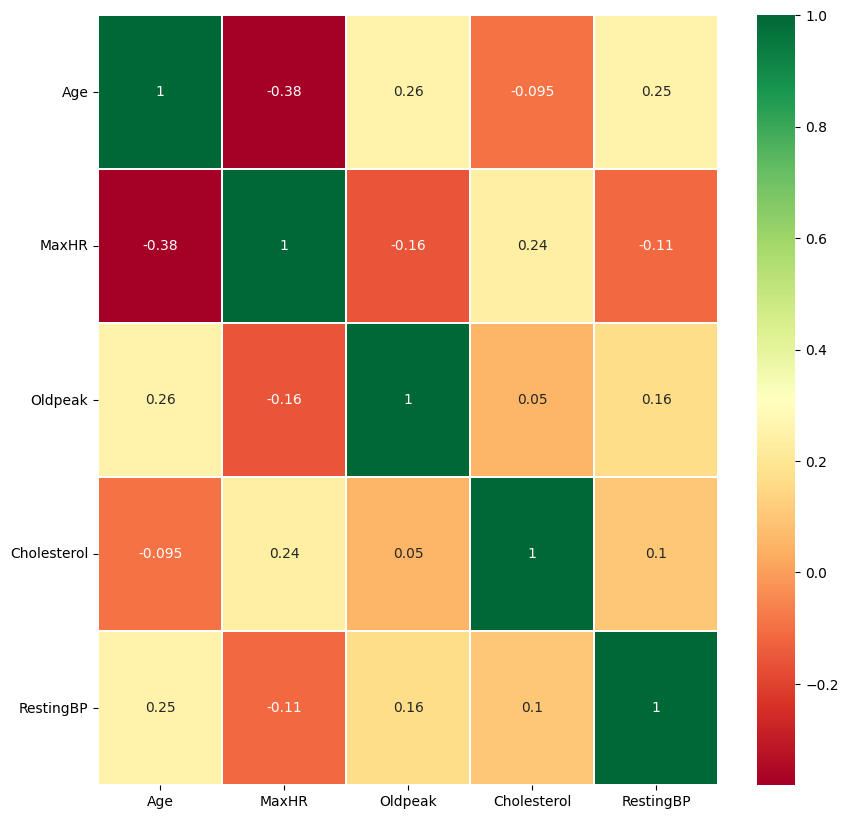

In [ ]:
sns.heatmap(data[['Age', 'MaxHR', 'Oldpeak', 'Cholesterol', 'RestingBP']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})

fig=plt.gcf()
fig.set_size_inches(10,10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

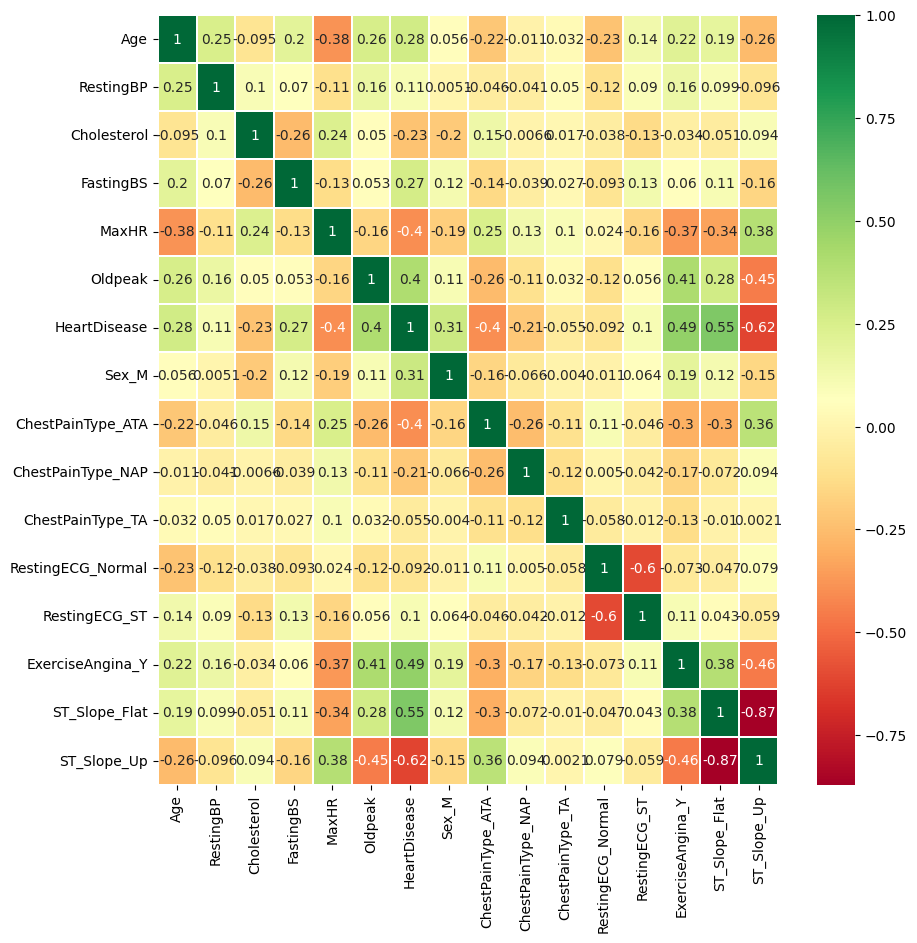

In [ ]:
sns.heatmap(pd.get_dummies(data, drop_first=True).corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})

fig=plt.gcf()
fig.set_size_inches(10,10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

# Probable feature engineering

The features are already mostly ready-to-go for ML, but we can try to do the following:

1. Add a factorized Age whith a threshold around 55 years, as this is the age approximately dividing HF and normal patients

2. Create a blood pressure groups (normal\high) using reference normal values for people of corresponding age and gender.
3. Factorize MaxHR variable with thershold around 140 bps.

4. Change ChestPainType to binary - ASY vs Others.
5. Factorize oldpeak as '=0', '0-1', '>1'


# Conclusion

The dataset is in almost perfect condition for ML, as all the features have impact on a target variable, there are no NAs, and correlation betweeb features are not strong.

Features with highest impact on a target variable are seemed to be ChestPainType, ExerciseAngina and ST_Slope, but other features have their impact too.

Least impact is observed for Cholesterol, RestingBP and RestingECG, and these variables are may be not included in model to prevent excessive noise.